In [11]:
import time
import numpy as np
from matplotlib import pyplot as plt
from init_mcmc_multi_state import init_mcmc
from trace_simulators import simulate_traces_poisson
from mcmc_helper_functions import *
from numpy.random import gamma
from scipy.stats import dirichlet

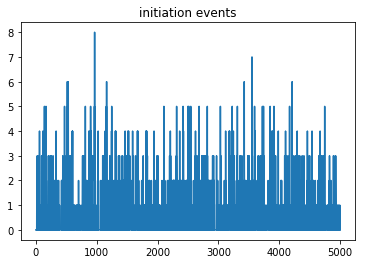

In [12]:
# transition and emission arrays
A = np.array([[.9, .3, 0],
              [.1, .5, .5],
              [0, .2, .5]])

lambda_vec = np.array([.1,1,2])

# basic trace parameters
memory = 7*10 # number of time steps for Pol II to teranscribe gene
dT = 20 # time resolution of experimental data
tau = 2 # minimum time scale of the system
cv_factor = int(dT/tau)
# Fix trace length for now
trace_len = 500 # length of simulated trace (time steps)
# Number of traces per batch
sigma = 20 # stdev of Gaussian noise
auPolII = 20 
alpha = 14
# set priors
a_prior = np.ones((3, 3))
e_prior = np.ones((3, 3))
pi0_prior = np.ones((3))

# simulate initiation events
fluo_noise, fluo_raw, fluo_unif, system_states, initiation_states = \
simulate_traces_poisson(tau,dT,memory,trace_len,A,lambda_vec,auPolII,sigma,alpha)

init_vec = initiation_states.astype(int)
# plot
fig2, ax2 = plt.subplots()
ax2.set_title("initiation events")
ax2.plot(initiation_states)

## test particle filter

In [13]:
start = time.time()
alpha_array = fwd_algorithm(init_vec, np.log(A), lambda_vec, np.log([.5, .2, .3]))
print(time.time()-start)

C:\Users\nlamm\projects\network_decoder\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


0.4805922508239746


In [14]:
start = time.time()
[beta_array, close] = bkwd_algorithm(init_vec, np.log(A), lambda_vec, np.log([.5, .2, .3]))
print(time.time()-start)

C:\Users\nlamm\projects\network_decoder\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


0.5356521606445312


In [15]:
a_counts, lambda_counts, pi0_counts, seq_log_probs, full_seq_probs,visit_counts =  \
empirical_counts(np.log(A), lambda_vec,  np.log([.5, .2, .3]), [init_vec], [alpha_array], [beta_array])

C:\Users\nlamm\projects\network_decoder\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [22]:
print(dirichlet.rvs(a_counts[:,2]+1,10))

[[3.69879073e-03 4.88315427e-01 5.07985782e-01]
 [7.69736338e-03 4.99798237e-01 4.92504399e-01]
 [5.60582962e-03 4.76711807e-01 5.17682363e-01]
 [4.34810844e-03 4.83290277e-01 5.12361614e-01]
 [2.98429291e-03 5.08328118e-01 4.88687589e-01]
 [1.01698748e-02 5.23386460e-01 4.66443665e-01]
 [8.96263104e-04 4.93811647e-01 5.05292089e-01]
 [2.69502365e-03 5.18164564e-01 4.79140413e-01]
 [1.29787685e-04 4.79738786e-01 5.20131427e-01]
 [1.69878837e-03 4.63777500e-01 5.34523711e-01]]
